In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data loading
data = pd.read_csv("train.csv")

In [ ]:
## Look around -- shape (rows and columns), head()/tail(), info()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [4]:
#print top 5 rows of the dataset
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [5]:
#column names
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#How to convert object to numerical data?
#label encoding
from sklearn.preprocessing import LabelEncoder

In [7]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [8]:
#Changing all values from 4+ to 4
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [9]:
#to check the null values
data.isnull().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [10]:
#changing the datatype to integer
data.dropna(inplace = True)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  object 
 2   Gender                      80582 non-null  object 
 3   Age                         80582 non-null  object 
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  object 
 6   Stay_In_Current_City_Years  80582 non-null  int32  
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 7.7+ MB


In [12]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
data = data.reset_index(drop=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80582 entries, 0 to 80581
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  object 
 2   Gender                      80582 non-null  object 
 3   Age                         80582 non-null  object 
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  object 
 6   Stay_In_Current_City_Years  80582 non-null  int32  
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 7.1+ MB


In [16]:
data.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,8.058200e+04,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000
mean,1.002950e+06,8.173426,1.860775,0.401752,2.738366,6.892085,12.658298,11628.183279
std,1.706623e+03,6.487913,1.285501,0.490255,2.563225,4.498417,4.129156,5069.515441
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.001470e+06,2.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7868.000000
50%,1.002996e+06,7.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11744.500000
75%,1.004326e+06,14.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15610.000000
max,1.006040e+06,20.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


In [17]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [22]:
data['Gender'].value_counts()

M    62549
F    18033
Name: Gender, dtype: int64

In [30]:
print(data[data['Gender']=='M']['User_ID'].count())
print(data[data['Gender']=='F']['User_ID'].count())


62549
18033


<AxesSubplot:xlabel='Gender', ylabel='count'>

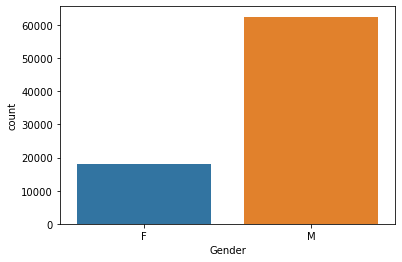

In [25]:
#visualizations to understand the distribution of the various features
sns.countplot(data = data, x = 'Gender')

<AxesSubplot:xlabel='Age', ylabel='count'>

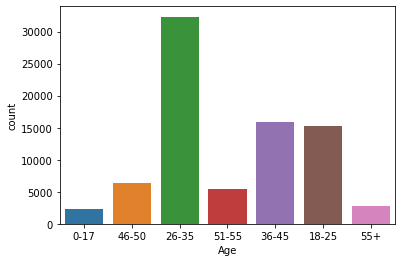

In [26]:
sns.countplot(data=data, x="Age")

<AxesSubplot:xlabel='Age', ylabel='count'>

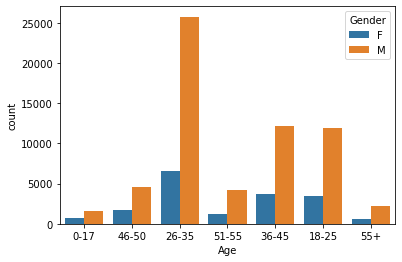

In [27]:
sns.countplot(data=data, x="Age", hue='Gender')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

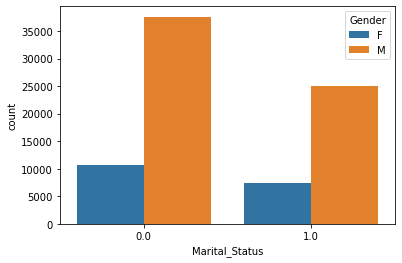

In [31]:
sns.countplot(data=data, x="Marital_Status",  hue="Gender")

C:\Users\jaina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

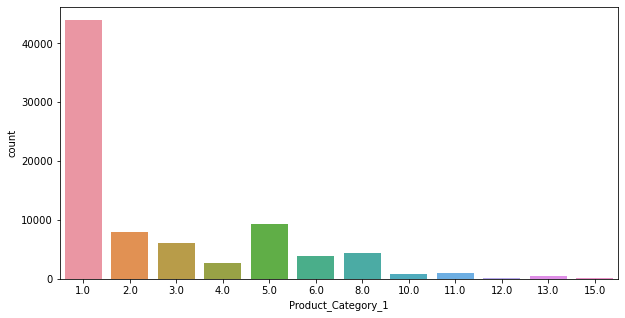

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_1']) #its frequency of unique values

In [ ]:
### The product_category_1 sees a great rise of product category 1 and lowest in 12th category

C:\Users\jaina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

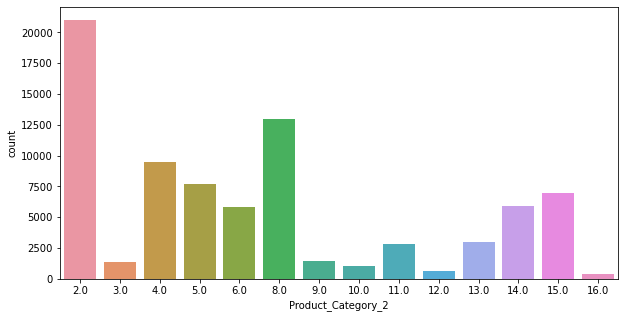

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_2'])

In [ ]:
# Product_Category_2 sees a considerate balance among categories. 
#With category 2 topping the charts, and other considerable categories are 8,,4,5,6,14,15,etc.

C:\Users\jaina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

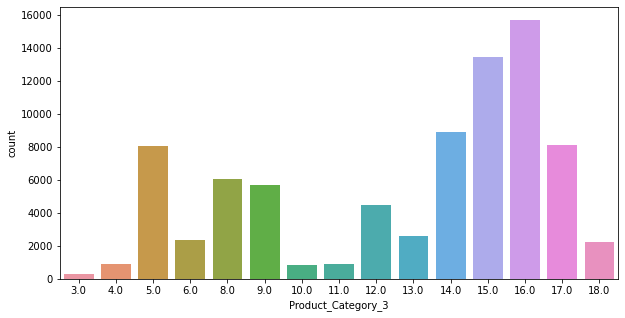

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_3'])

In [ ]:
# For product_category_3, the balance is towards the end with 16 topping the charts, 
#and other considerable categories are 15, 14, 5, 8, 9, 17, etc.

C:\Users\jaina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

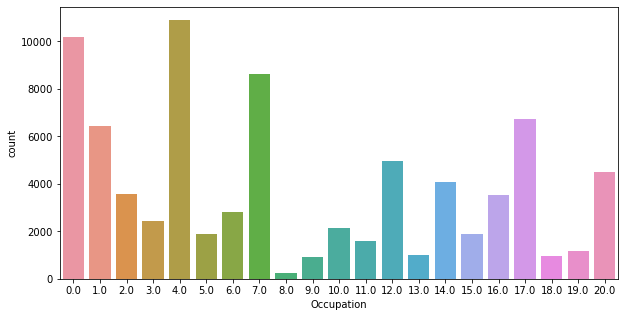

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])

In [ ]:
### occupation also sees a constant balance with 4 topping the chart, 
#and other categories in the considerable amount with 0,1,2,7,12,17,20.

C:\Users\jaina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

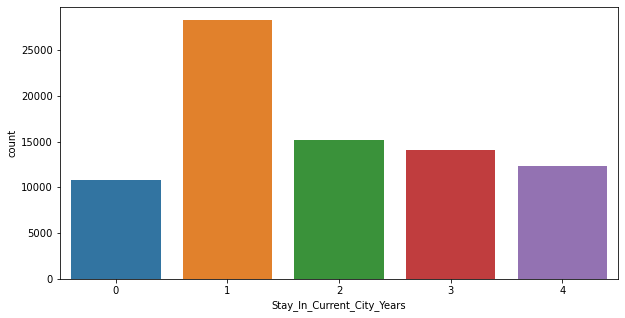

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data['Stay_In_Current_City_Years'])

In [ ]:
### Majority of the customers have stayed a year in the city.

C:\Users\jaina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

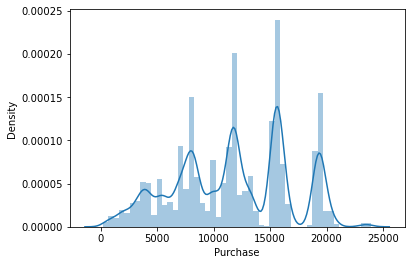

In [38]:
sns.distplot(data['Purchase'])

In [ ]:
#Purchases are not accumulated in a range, rather varies in different intervals

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80582 entries, 0 to 80581
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  object 
 2   Gender                      80582 non-null  object 
 3   Age                         80582 non-null  object 
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  object 
 6   Stay_In_Current_City_Years  80582 non-null  int32  
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 7.1+ MB


In [40]:
#label encoding to convert categorical to numerical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_list = ['User_ID', "Product_ID", "Gender",'Age', 'City_Category']

for col in col_list:
    data[col] = le.fit_transform(data[col])
    print(col, le.classes_)

User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000642' 'P00001042' 'P00001142' 'P00001542'
 'P00002142' 'P00002242' 'P00003442' 'P00004242' 'P00004842' 'P00005542'
 'P00005942' 'P00006942' 'P00008042' 'P00010542' 'P00010742' 'P00010942'
 'P00011942' 'P00012242' 'P00014442' 'P00014642' 'P00014842' 'P00015542'
 'P00015642' 'P00015842' 'P00015942' 'P00016342' 'P00016442' 'P00016542'
 'P00016742' 'P00016842' 'P00019042' 'P00019342' 'P00021842' 'P00023342'
 'P00024142' 'P00025242' 'P00025342' 'P00025442' 'P00026042' 'P00028442'
 'P00028542' 'P00029542' 'P00030842' 'P00030942' 'P00031842' 'P00032042'
 'P00034042' 'P00034142' 'P00034242' 'P00034442' 'P00034742' 'P00035042'
 'P00035342' 'P00035542' 'P00035842' 'P00035942' 'P00036842' 'P00037142'
 'P00038042' 'P00038142' 'P00041342' 'P00041442' 'P00042142' 'P00043842'
 'P00044242' 'P00045042' 'P00045142' 'P00045242' 'P00045342' 'P00046742'
 'P00048042' 'P00048342' 'P00050042' 'P00050342' 'P

In [41]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,391,0,0,10.0,0,2,0.0,1.0,6.0,14.0,15200.0
1,3,284,1,4,7.0,1,2,1.0,1.0,8.0,17.0,19215.0
2,4,211,1,2,20.0,0,1,1.0,1.0,2.0,5.0,15665.0
3,5,363,0,5,9.0,0,1,0.0,5.0,8.0,14.0,5378.0
4,5,517,0,5,9.0,0,1,0.0,2.0,3.0,4.0,13055.0


In [42]:
## Correlations

data.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.008247,-0.031117,0.037451,-0.011876,0.019336,-0.027410,0.015240,0.007023,0.007372,0.002163,0.000603
Product_ID,-0.008247,1.000000,0.014412,0.021192,0.007119,-0.025223,-0.003153,0.010618,0.019471,0.024563,0.019219,-0.108025
Gender,-0.031117,0.014412,1.000000,-0.008751,0.110055,-0.002937,0.012817,-0.010459,-0.069258,-0.016422,0.033820,0.060034
Age,0.037451,0.021192,-0.008751,1.000000,0.100146,0.098402,-0.010013,0.311430,0.052910,0.047808,0.054444,0.023078
Occupation,-0.011876,0.007119,0.110055,0.100146,1.000000,0.038839,0.025064,0.031437,-0.013515,0.000714,0.013637,0.022187
City_Category,0.019336,-0.025223,-0.002937,0.098402,0.038839,1.000000,0.015376,0.043686,-0.020706,-0.004918,-0.000876,0.076327
Stay_In_Current_City_Years,-0.027410,-0.003153,0.012817,-0.010013,0.025064,0.015376,1.000000,-0.015000,-0.006038,-0.000815,0.000347,0.003687
Marital_Status,0.015240,0.010618,-0.010459,0.311430,0.031437,0.043686,-0.015000,1.000000,0.016434,0.011027,0.016609,0.008585
Product_Category_1,0.007023,0.019471,-0.069258,0.052910,-0.013515,-0.020706,-0.006038,0.016434,1.000000,0.496955,0.229194,-0.399093
Product_Category_2,0.007372,0.024563,-0.016422,0.047808,0.000714,-0.004918,-0.000815,0.011027,0.496955,1.000000,0.545300,-0.152532


<AxesSubplot:>

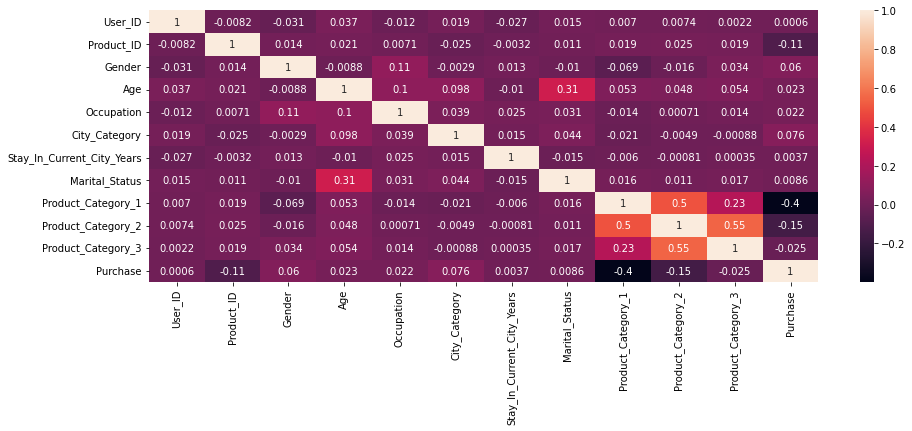

In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)

## Statistical Analysis

It was observed that the average purchase made by the Men of the age 18-25
was 10000. Is it still the same?


In [ ]:
#NUll hypothesis  - The mean is 10000
#Alternate hypothesis - The mean is not 10000

In [ ]:
#One sample Z-test = is used to test whether or not the mean of a population is equal to some value.
#is used to compare the means of two groups.

In [44]:
new_data = data.loc[(data["Age"]==1) & data['Gender']==1] #Male and 18-25
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
37,20,487,1,1,15.0,0,4,0.0,1.0,8.0,17.0,12099.0
38,20,402,1,1,15.0,0,4,0.0,1.0,11.0,16.0,12098.0
39,20,358,1,1,15.0,0,4,0.0,2.0,4.0,15.0,9564.0
49,23,332,1,1,4.0,2,4,0.0,1.0,5.0,9.0,15361.0
50,23,71,1,1,4.0,2,4,0.0,1.0,2.0,15.0,15770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80491,4206,180,1,1,18.0,1,1,1.0,1.0,2.0,15.0,11512.0
80492,4206,394,1,1,18.0,1,1,1.0,1.0,15.0,18.0,11521.0
80493,4206,23,1,1,18.0,1,1,1.0,1.0,2.0,13.0,3988.0
80494,4206,75,1,1,18.0,1,1,1.0,5.0,8.0,17.0,5444.0


In [45]:
new_data.shape

(11904, 12)

In [79]:
sample_size = 1000
sample = new_data.sample(sample_size, random_state=28372831)
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
65438,2861,178,1,1,4.0,0,4,0.0,1.0,2.0,15.0,12074.0
20966,4273,225,1,1,3.0,2,2,1.0,11.0,13.0,16.0,1563.0
27908,1964,184,1,1,0.0,2,4,0.0,1.0,2.0,5.0,15752.0
18046,3008,151,1,1,7.0,2,2,1.0,1.0,11.0,15.0,19437.0
42255,3198,454,1,1,4.0,0,0,0.0,5.0,8.0,17.0,5250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30520,3315,487,1,1,4.0,0,0,0.0,1.0,8.0,17.0,11638.0
78086,3198,355,1,1,4.0,0,0,0.0,1.0,8.0,17.0,19009.0
24146,185,80,1,1,1.0,1,2,0.0,1.0,2.0,16.0,4345.0
588,290,294,1,1,4.0,1,4,0.0,2.0,4.0,5.0,9918.0


In [85]:
p_mean = 10000

In [80]:
sample_mean = sample["Purchase"].mean()
print(sample_mean)

11751.189


In [83]:
#one sample t test
from scipy.stats import ttest_1samp

In [86]:
t_stat, p_value = ttest_1samp(sample['Purchase'], p_mean)
print(t_stat, p_value)

10.850760062257608 5.224618210879186e-26


In [ ]:
#p value is less than 0.05 , reject the null hypothesis.
#Therefore, the mean purchase for men ages 18-25 is not 10000.

It was observed that the percentage of women of the age that spend more than
10000 was 35%. Is it still the same?

In [ ]:
#NUll hypothesis  - proportion is 35%
#Alternate hypothesis - proportion is not 35%

In [87]:
data_new = data.loc[(data['Purchase']>10000)]

In [88]:
data_new.shape

(49390, 12)

In [89]:
#no of women in the sample
count = data_new["Gender"].value_counts()[0]

#no. of obs
nobs = len(data_new["Gender"])

#hypothesise value
p0 = 0.35

In [90]:
count

10175

In [91]:
nobs

49390

In [92]:
data_new["Gender"].value_counts()/nobs

1    0.793987
0    0.206013
Name: Gender, dtype: float64

In [ ]:
#Ztest - used to determine whether two population means are different when the variances are known.

In [93]:
from statsmodels.stats.proportion import proportions_ztest

In [94]:
z_stat, p_value = proportions_ztest(count=count,nobs=nobs, value=p0)
print(z_stat, p_value)

-79.12020590883206 0.0


In [ ]:
#p-value is less than 0.05, reject the null hypothesis i.e.., proportion is not 35%

Is the average purchase made by men and women of the age 18-25 same?

In [95]:
#null hypothesis - average spends are equal 
#alternate hypothesis - average spends are not equal

data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 1)]

In [96]:
#creating samples
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [97]:
#checking variances of the two samples
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25403579.49849695
26680870.93292181


In [98]:
#sample means 
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

11885.35
10758.212


In [99]:
#compute f statistic
from scipy.stats import f #f-test is used to compare the variances
F = data_men_sample.Purchase.mean()/data_women_sample.Purchase.mean()
F

1.1047700119685318

In [100]:
#calculating the degrees of freedom 

#Degrees of freedom is the number of independent pieces of 
#information used to calculate a statistic.

df1 = len(data_men_sample) - 1
df2 = len(data_women_sample) - 1

print(df1, df2)

499 499


In [101]:
#p-value

#cdf - The cumulative distribution function is used 
#to describe the probability distribution of random variables

import scipy
scipy.stats.f.cdf(F, df1, df2)

0.8669472154638921

In [ ]:
#the p-value is greater than 0.05, do not reject the null hypothesis. 
#the null hypothesis is true. The average purchases are same. 

Is the percentage of men who have spent more than 10000 the same for the
ages 18-25 and 26-35?

In [102]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase'] > 10000)]

In [103]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [104]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [105]:
count

[815, 828]

In [106]:
nobs

[1000, 1000]

In [107]:
from statsmodels.stats.proportion import proportions_ztest
stat_2sample, p_value_2sample = proportions_ztest(count=count, 
                                                  nobs=nobs)

In [108]:
p_value_2sample

0.44778597581119517

In [ ]:
#p value is more than 0.05, accept the null hypthesis. 
#therefore, Percentage of the men in the age groups is same